<a href="https://colab.research.google.com/github/Catifode/Catifode/blob/main/Coding_Task_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%cd /content/drive/MyDrive/xray_images/

/content/drive/MyDrive/xray_images


In [41]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
import random

In [63]:
ROOT_DIR = "/content/drive/MyDrive/xray_images"
imgs = ['COVID','Normal','Lung_Opacity','Viral Pneumonia']

NEW_DIR = "/content/zzzz/"

In [64]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")

    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)

else:
  print("Already Exist")

In [65]:
counter = {'COVID':0,'Normal':0,'Lung_Opacity':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

counter

{'COVID': 3616, 'Normal': 10192, 'Lung_Opacity': 6012, 'Viral Pneumonia': 1345}

In [66]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Covid")
  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Lung_Opacity")
  os.makedirs(NEW_DIR+"train_test_split/train/Viral Pneumonia")


  os.makedirs(NEW_DIR+"train_test_split/test/Covid")
  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Lung_Opacity")
  os.makedirs(NEW_DIR+"train_test_split/test/Viral Pneumonia")

  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")
  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Lung_Opacity")
  os.makedirs(NEW_DIR+"train_test_split/validation/Viral Pneumonia")


  for i in np.random.choice(replace= False , size= 2532 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 7134 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 4208 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Lung_Opacity" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 941 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Viral Pneumonia" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 542 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 1529 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 902 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Lung_Opacity" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 202 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Viral Pneumonia" )
    os.remove(i)


  for i in np.random.choice(replace= False , size= 542 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 1529 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 902 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Lung_Opacity" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 202 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Viral Pneumonia" )
    os.remove(i)

In [67]:
train_path  = "/content/zzzz/train_test_split/train"
test_path  = "/content/zzzz/train_test_split/test"
valid_path   = "/content/zzzz/train_test_split/validation"

In [69]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [70]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           target_size=(224,224))

Found 14815 images belonging to 4 classes.


In [71]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path,
                                                target_size=(224,224))

Found 3175 images belonging to 4 classes.


In [72]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 3175 images belonging to 4 classes.


In [73]:
class_type = {0:'Covid', 1 : 'Normal', 2:'Lung_Opacity', 3 : 'Viral Pneumonia'}

In [74]:
t_img , label = train.next()

In [75]:
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

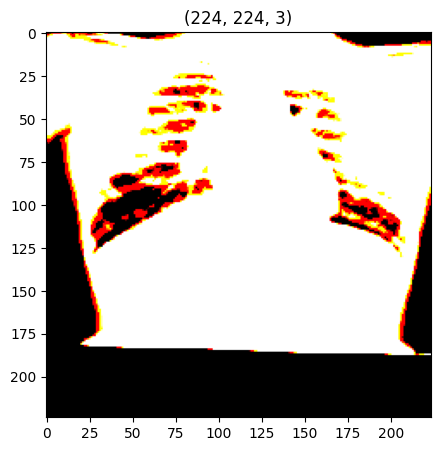

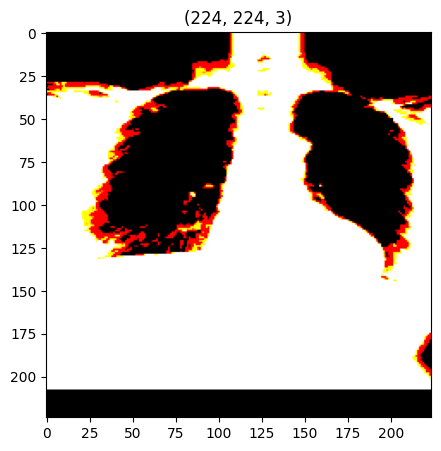

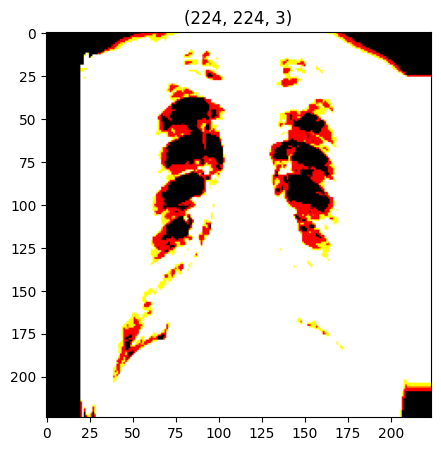

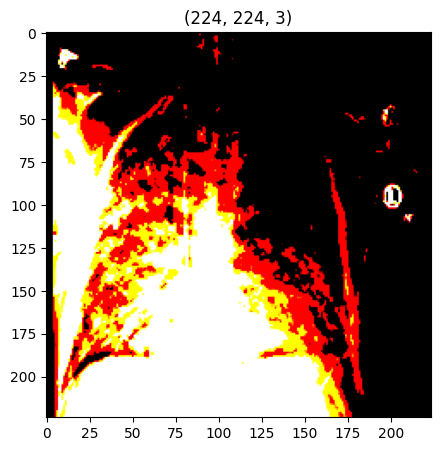

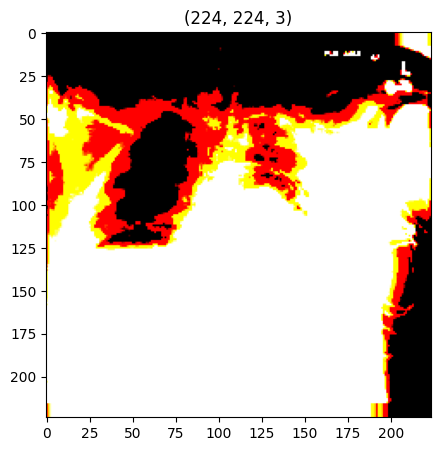

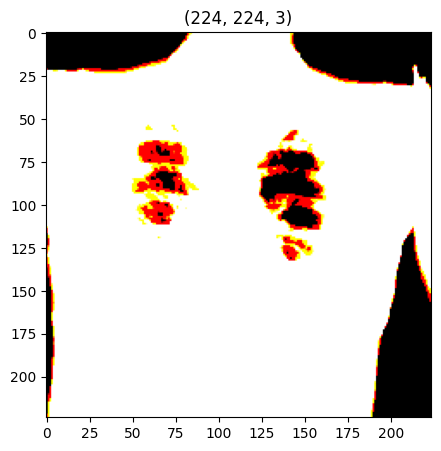

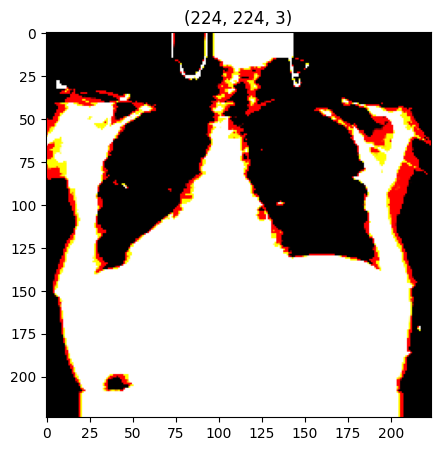

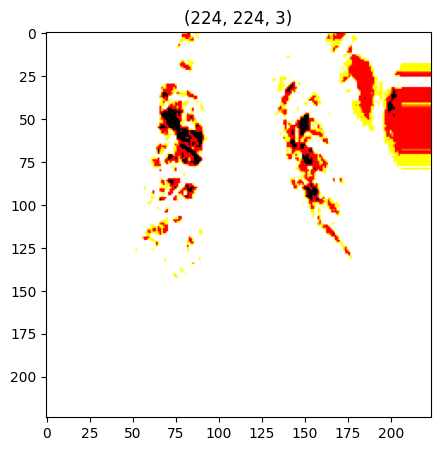

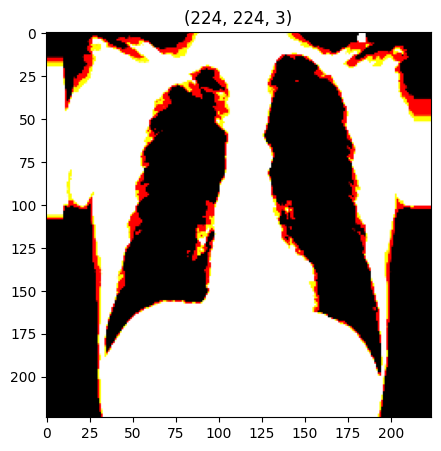

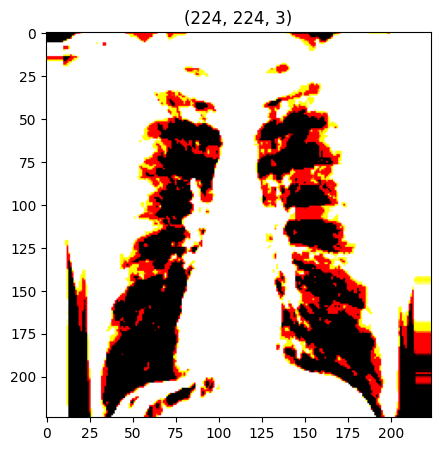

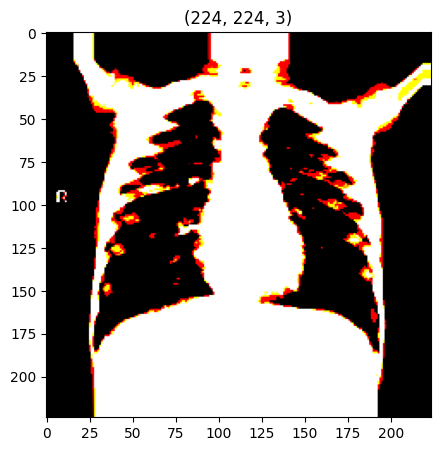

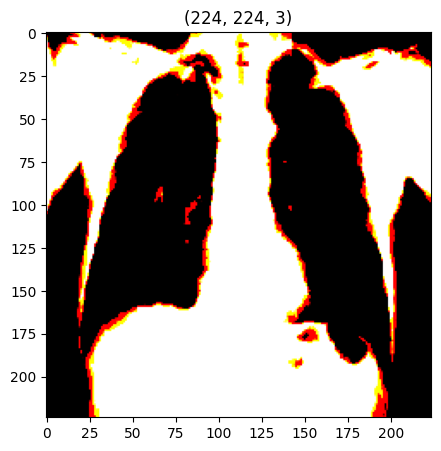

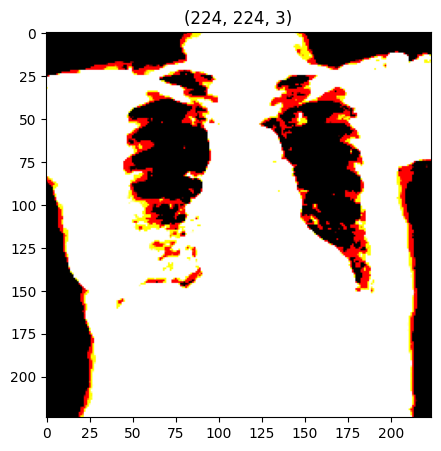

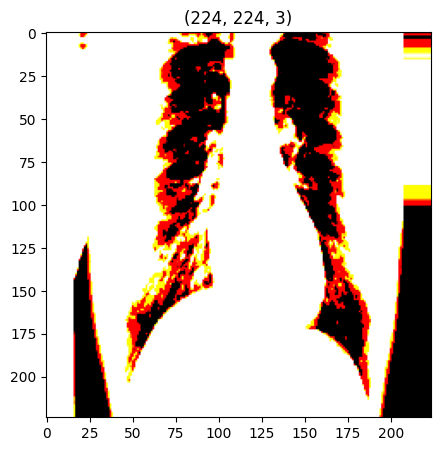

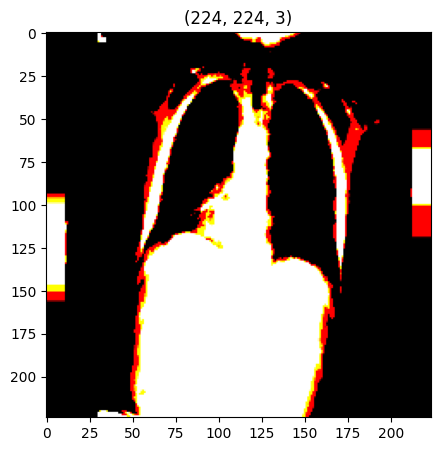

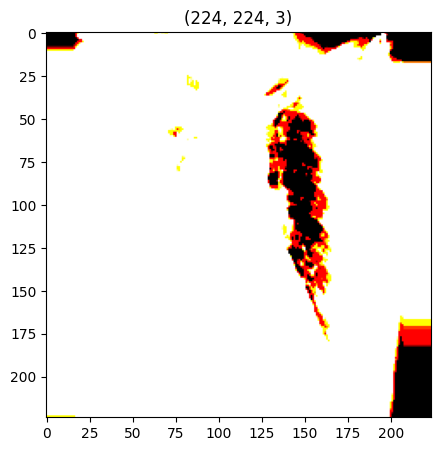

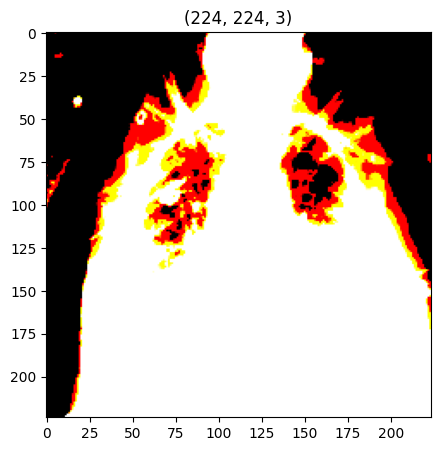

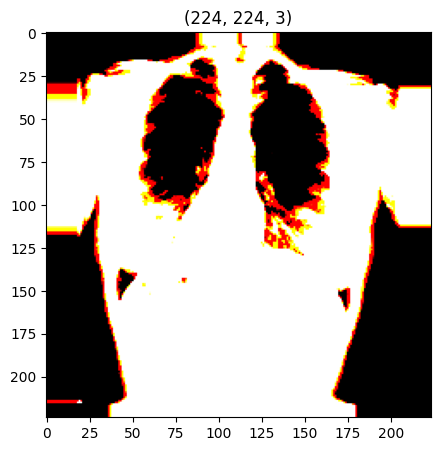

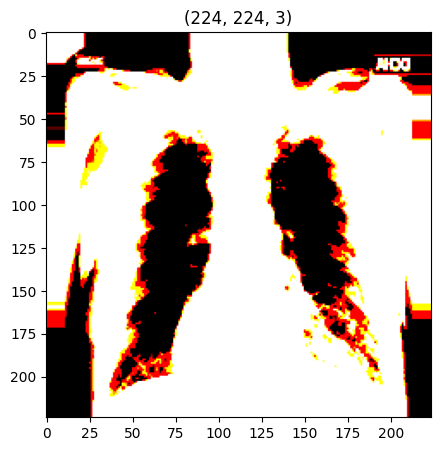

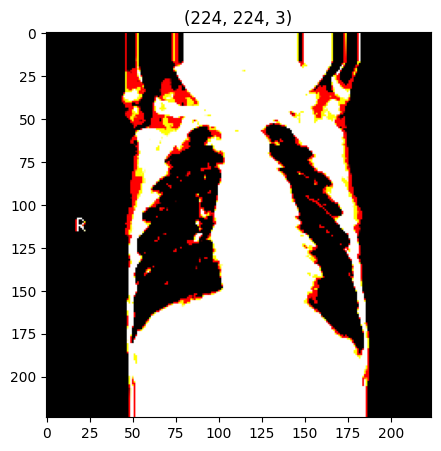

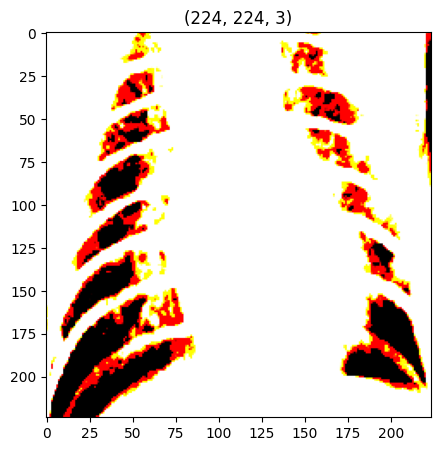

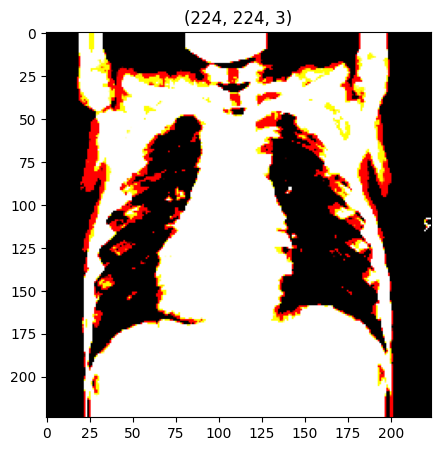

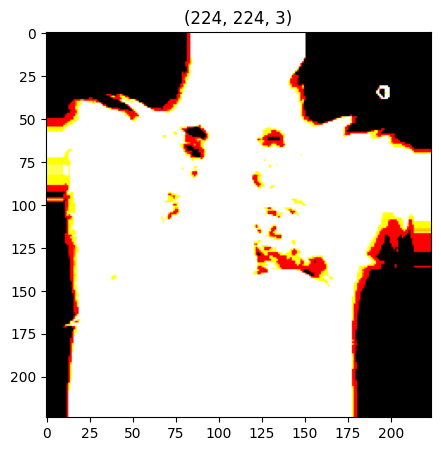

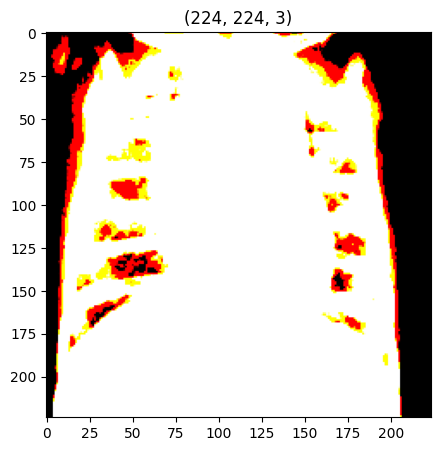

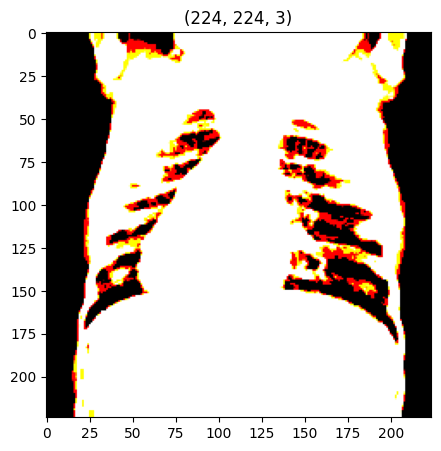

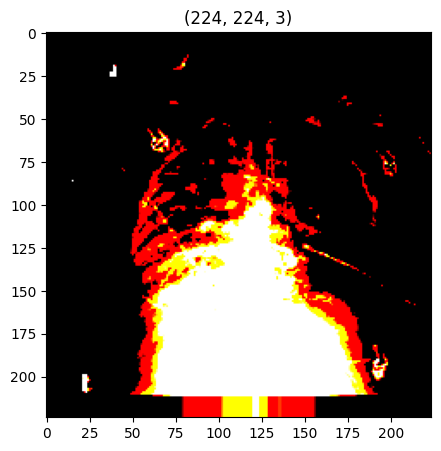

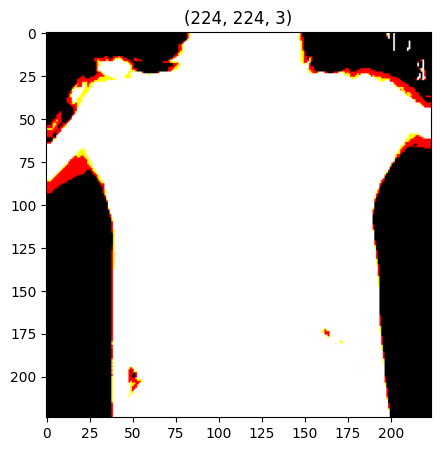

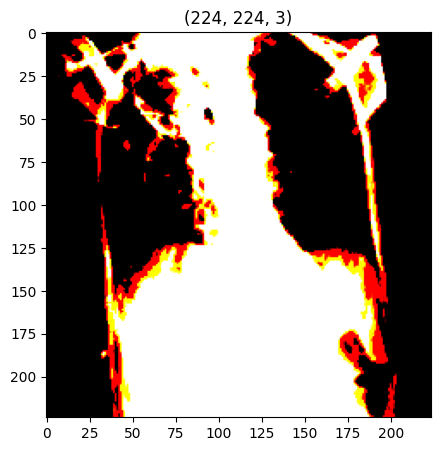

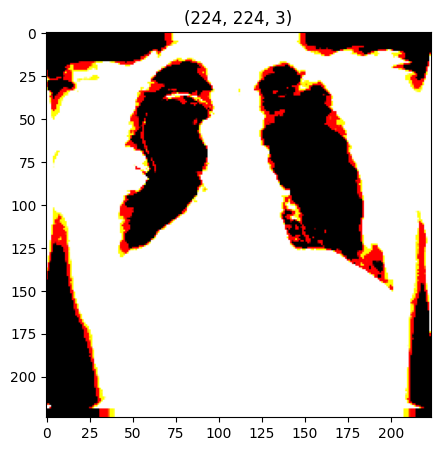

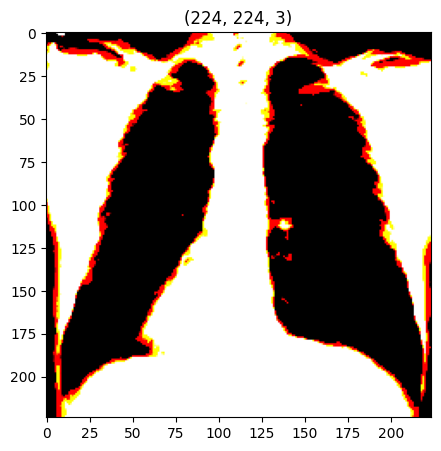

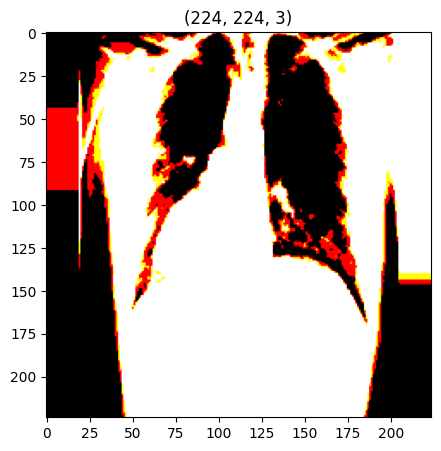

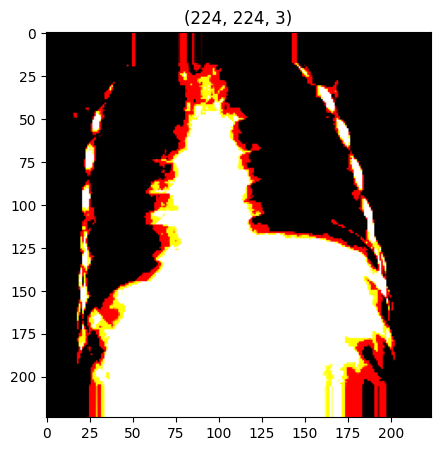

In [76]:
plotImages(t_img, label)

In [77]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [78]:
res = ResNet50( input_shape=(224,224,3), include_top= False)

In [79]:
for layer in res.layers:
  layer.trainable = False

In [80]:
x = Flatten()(res.output)
x = Dense(units=4 , activation='sigmoid', name = 'predictions' )(x)


model = Model(res.input, x)

In [81]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [82]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [83]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [84]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

<ipython-input-84-673b6a6f7538>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 13.2626 - accuracy: 0.5625
Epoch 1: val_accuracy improved from -inf to 0.70508, saving model to bestmodel.h5
10/10 [==============================] - 174s 18s/step - loss: 13.2626 - accuracy: 0.5625 - val_loss: 9.3621 - val_accuracy: 0.7051
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 8.9368 - accuracy: 0.6781
Epoch 2: val_accuracy improved from 0.70508 to 0.71680, saving model to bestmodel.h5
10/10 [==============================] - 208s 22s/step - loss: 8.9368 - accuracy: 0.6781 - val_loss: 7.3101 - val_accuracy: 0.7168
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.1255 - accuracy: 0.6969
Epoch 3: val_accuracy improved from 0.71680 to 0.74609, saving model to bestmodel.h5
10/10 [==============================] - 207s 22s/step - loss: 6.1255 - accuracy: 0.6969 - val_loss: 5.8512 - val_accuracy: 0.7461
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 4.0

In [85]:
from keras.models import load_model
model = load_model("bestmodel.h5")


In [86]:
acc = model.evaluate(test)[1]

print(f"The accuracy of your model is = {acc} %")

100/100 [==============================] - 621s 6s/step - loss: 2.8453 - accuracy: 0.8076
The accuracy of your model is = 0.807559072971344 %


In [87]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

1/1 [==============================] - 0s 353ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 450ms/step
The chances of image being Covid is : 100.0 percent

1/1 [==============================] - 0s 284ms/step
The chances of image being Normal is : 99.99997615814209 percent

1/1 [==============================] - 0s 325ms/step
The chances of image being Lung_Opacity is : 100.0 percent

1/1 [==============================] - 0s 330ms/step
The chances of image being Viral Pneumonia is : 4.0545718062027277e-13 percent


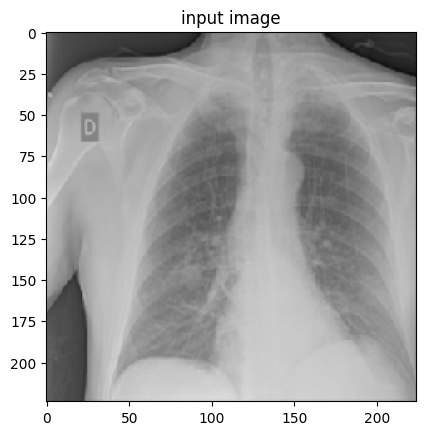

In [100]:
path = "/content/zzzz/train_test_split/validation/Covid/COVID-2203.png"

img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")
print()
print(f"The chances of image being Lung_Opacity is : {model.predict(img)[0][2]*100} percent")
print()
print(f"The chances of image being Viral Pneumonia is : {model.predict(img)[0][3]*100} percent")

plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()